## LPF 38AB Moduł Peltiera jako chłodziarka oraz pompa ciepła

In [1]:
import numpy as np
import pandas as pd
#import sympy as sym
import matplotlib.pyplot as plt
from scipy import constants as const

### Wczytanie danych

In [2]:
data1 = pd.read_csv('tab1.txt', delimiter=' ', index_col='Lp.')
data2 = pd.read_csv('tab2.txt', delimiter=' ', index_col='Lp.')
data3 = pd.read_csv('tab3.txt', delimiter=' ', index_col='Lp.')

val = {}
val['m'] = 130.4 #g
val['c'] = 0.3855 #J/gK
val['T_R'] = 10.3 #deg C
val['T_O'] = 24.0 #deg C

val['I'] = 1.19 #V


data2.head()

,I,T1,T2
Lp.,,,
1,0.00,24.8,24.8
2,0.37,19.5,25.8
3,0.74,14.8,26.8
4,1.09,11.1,28.1
5,1.38,8.6,29.6


### Niepewności

In [3]:
def calc_Dp_Termometr_T(T, res_T):
    return 1

def calc_Dp_Zasilacz_I(I, res_I):
    return I * 1./100 + 1 * res_I

def calc_Dp_Zasilacz_U(U, res_U):
    return U * 1./100 + 1 * res_U

def calc_uA(series, mean):
    s = 0
    for x in series:
        s += (x - mean)**2
    s /= len(series)*(len(series)-1)
    return np.sqrt(s)

def calc_uB(Deltas):
    s = 0
    for D in Deltas:
        s += D**2 / 3
    return np.sqrt(s)

#Rozdzielczości
val['res_T'] = 0.1
val['res_I'] = 0.01
val['res_U'] = 0.1

#Niepewności
val['uI'] = calc_uB([calc_Dp_Zasilacz_I(val['I'],val['res_I'])])

data1['uT2'] = data1.apply(lambda row: calc_uB([ calc_Dp_Termometr_T(row['T2'], val['res_T']) ]), axis=1)
data1['uU'] = data1.apply(lambda row: calc_uB([ calc_Dp_Zasilacz_U(row['U'], val['res_U']) ]), axis=1)

data2['uI'] = data2.apply(lambda row: calc_uB([ calc_Dp_Zasilacz_I(row['I'], val['res_I']) ]), axis=1)
data2['uT1'] = data2.apply(lambda row: calc_uB([ calc_Dp_Termometr_T(row['T1'], val['res_T']) ]), axis=1)
data2['uT2'] = data2.apply(lambda row: calc_uB([ calc_Dp_Termometr_T(row['T2'], val['res_T']) ]), axis=1)

data3['uT2'] = data3.apply(lambda row: calc_uB([ calc_Dp_Termometr_T(row['T2'], val['res_T']) ]), axis=1)
data3['uU'] = data3.apply(lambda row: calc_uB([ calc_Dp_Zasilacz_U(row['U'], val['res_U']) ]), axis=1)

val['uT'] = calc_uB([ calc_Dp_Termometr_T(1,val['res_T']) ])
val['ut'] = 1/np.sqrt(3)

### Tab 1

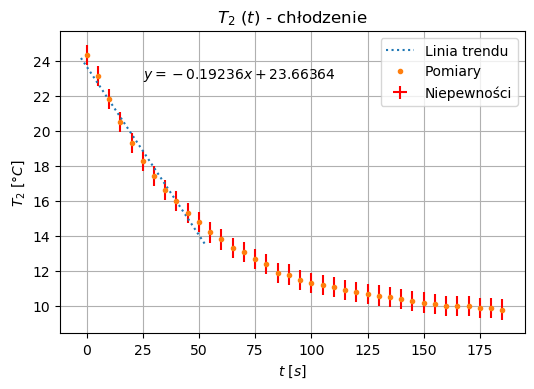

[-0.19236364 23.66363636] 0.009485574568006692 0.28058707966434127


In [4]:
plt.rcParams['figure.dpi'] = 100

x = data1['t']
y = data1['T2']
xerr = np.ones(len(x)) * val['ut']
yerr = data1['uT2']

fig, ax1 = plt.subplots()


#p, V = np.polyfit(x,y,2, full=False, cov=True)
p1, V1 = np.polyfit(x[x<=50],y[x<=50],1, full=False, cov=True)

#plt.plot(x, p[0]*x**2 + p[1]*x + p[2],':',label='Linia trendu')
plt.plot(x[x<=55]-2.5, p1[0]*(x[x<=55]-2.5) + p1[1],':',label='Linia trendu')
#plt.plot(x, 2*p[0]*x + p[1], '-', label='Pochodna linii trendu', linewidth=1)
#plt.plot(x[x<=50]-2.5,y[x<=50].diff()/x[x<=50].diff(), '.', label="$\Delta T / \Delta t$", markersize=3)
#plt.plot(x[x<=50],np.ones(len(x[x<=50]))*p1[0], '-', label="$y={:.5}$".format(p1[0]), linewidth=1)

DT_Dt = (y[x<=50].diff()/x[x<=50].diff()).mean()
#print(y.diff()/x.diff(),y)
    
val['dT_dt_chl'] = p1[0]

val['udT_dt_chl'] = np.sqrt(V1[0][0])

val['dot_Q_chl'] = val['m'] * val['c'] * val['dT_dt_chl']

val['udot_Q_chl'] = np.sqrt(val['udT_dt_chl']**2 * (val['m'] * val['c'])**2)



#ax2 = ax1.twinx()

plt.plot(x,y,'.',label="Pomiary")

# ax1.set_xlabel('$t\ [s]$')
# ax1.set_ylabel('$T_2\ [\degree C]$')
# ax2.set_ylabel('Y2 data', color='b')
plt.xlabel('$t\ [s]$')
plt.ylabel('$T_2\ [\degree C]$')
plt.errorbar(x=x, y=y, xerr=xerr, yerr=yerr,fmt='none',color='red',label="Niepewności")

#plt.ylim(bottom=-4)
plt.grid(which='both',axis='both')
#plt.text(50, 8, '$y={:.5f}x^2{:.5f}x+{:.5f}$'.format(p[0],p[1],p[2]))
plt.text(25, 23, '$y={:.5f}x+{:.5f}$'.format(p1[0],p1[1]))
plt.legend()
plt.title("$T_2\ (t)$ - chłodzenie")
plt.savefig("T_t_chl.png", dpi=600)
plt.show()

print(p1,np.sqrt(V1[0][0]),np.sqrt(V1[1][1]))

### Tab 2

In [5]:
data2['T2-T1'] = data2['T2'] - data2['T1']
data2['uDT21'] = np.sqrt(data2['uT2']**2 + data2['uT1']**2)
data2.head()

,I,T1,T2,uI,uT1,uT2,T2-T1,uDT21
Lp.,,,,,,,,
1,0.00,24.8,24.8,0.005774,0.57735,0.57735,0.0,0.816497
2,0.37,19.5,25.8,0.007910,0.57735,0.57735,6.3,0.816497
3,0.74,14.8,26.8,0.010046,0.57735,0.57735,12.0,0.816497
4,1.09,11.1,28.1,0.012067,0.57735,0.57735,17.0,0.816497
5,1.38,8.6,29.6,0.013741,0.57735,0.57735,21.0,0.816497


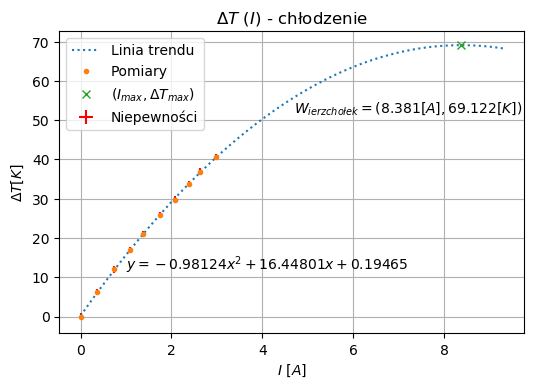

[-0.98123531 16.44800539  0.19464885] [0.06993521 0.21766001 0.1421101 ]


In [6]:
plt.rcParams['figure.dpi'] = 100

x = data2['I']
y = data2['T2-T1']
xerr = data2['uI']
yerr = data2['uDT21']

fig, ax1 = plt.subplots()


p, V = np.polyfit(x,y,2, full=False, cov=True)
#p1, V1 = np.polyfit(x[x<=50],y[x<=50],1, full=False, cov=True)


#plt.plot(x[x<=55]-2.5, p1[0]*(x[x<=55]-2.5) + p1[1],':',label='Linia trendu')
#plt.plot(x, 2*p[0]*x + p[1], '-', label='Pochodna linii trendu', linewidth=1)
#plt.plot(x[x<=50]-2.5,y[x<=50].diff()/x[x<=50].diff(), '.', label="$\Delta T / \Delta t$", markersize=3)
#plt.plot(x[x<=50],np.ones(len(x[x<=50]))*p1[0], '-', label="$y={:.5}$".format(p1[0]), linewidth=1)


#ax2 = ax1.twinx()




val['I_max'] = -p[1] / (2 * p[0])
val['uI_max'] = np.sqrt((-p[1] / (2 * p[0]**2) )**2 * V[0][0] +
                       + (-1/(2 * p[0]))**2 * V[1][1])
val['DT21_max'] = -(p[1]**2 - 4 * p[0] * p[2])/(4*p[0])
val['uDT21_max'] = np.sqrt( (-p[1]**2/(4*p[0]**2))**2 * V[0][0] +
                          + (-2*p[1]/(4*p[0]))**2 * V[1][1] +
                          + (1)**2 * V[2][2])

x0 = np.arange(x.iloc[0],val['I_max']+1,0.1)

plt.plot(x0, p[0]*x0**2 + p[1]*x0 + p[2],':',label='Linia trendu')
plt.plot(x,y,'.',label="Pomiary")
plt.plot(val['I_max'], val['DT21_max'], 'x', label = "$(I_{max}, \Delta T_{max})$")


# ax1.set_xlabel('$t\ [s]$')
# ax1.set_ylabel('$T_2\ [\degree C]$')
# ax2.set_ylabel('Y2 data', color='b')
plt.xlabel('$I\ [A]$')
plt.ylabel('$\Delta T [K]$')
plt.errorbar(x=x, y=y, xerr=xerr, yerr=yerr,fmt='none',color='red',label="Niepewności")

#plt.ylim(bottom=-4)
plt.grid(which='both',axis='both')
plt.text(1.0, 12, '$y={:.5f}x^2+{:.5f}x+{:.5f}$'.format(p[0],p[1],p[2]))
plt.text(4.7, 52, '$W_{ierzchołek}=(%.3f [A],%.3f [K])$' % (val['I_max'], val['DT21_max']))
#plt.text(25, 23, '$y={:.5f}x+{:.5f}$'.format(p1[0],p1[1]))
plt.legend()
plt.title("$\Delta T\ (I)$ - chłodzenie")
plt.savefig("DT_I.png", dpi=600)
plt.show()

print(p,np.sqrt([V[0][0],V[1][1],V[2][2]]))

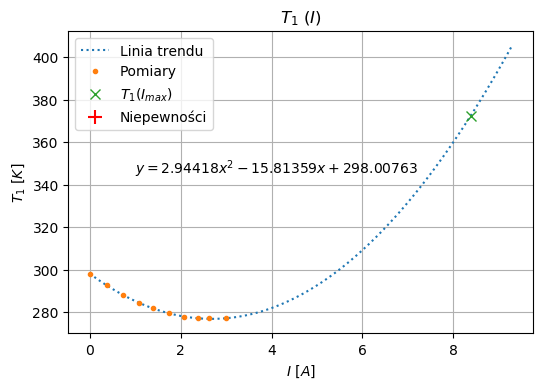

[  2.94418336 -15.81358805 298.00763493] [0.03586622 0.11162678 0.07288107]


In [7]:
plt.rcParams['figure.dpi'] = 100

x = data2['I']
y = data2['T1'] + 273.15 # \deg C -> K
xerr = data2['uI']
yerr = data2['uT1']

fig, ax1 = plt.subplots()


p, V = np.polyfit(x,y,2, full=False, cov=True)
#p1, V1 = np.polyfit(x[x<=50],y[x<=50],1, full=False, cov=True)






#plt.plot(x[x<=55]-2.5, p1[0]*(x[x<=55]-2.5) + p1[1],':',label='Linia trendu')
#plt.plot(x, 2*p[0]*x + p[1], '-', label='Pochodna linii trendu', linewidth=1)
#plt.plot(x[x<=50]-2.5,y[x<=50].diff()/x[x<=50].diff(), '.', label="$\Delta T / \Delta t$", markersize=3)
#plt.plot(x[x<=50],np.ones(len(x[x<=50]))*p1[0], '-', label="$y={:.5}$".format(p1[0]), linewidth=1)


#ax2 = ax1.twinx()



val['T1_I_max'] = p[0]*val['I_max']**2 + p[1]*val['I_max'] + p[2]
val['uT1_I_max'] = np.sqrt((val['I_max']**2)**2 * V[0][0] +
                           + (val['I_max'])**2 * V[1][1] + 
                           + (1)**2 * V[2][2] +
                           + (2*p[0] + p[1])**2 * val['uI_max']**2)

val['Z'] = 2 * val['DT21_max'] / val['T1_I_max']**2
dZ_dDT = 2 / val['T1_I_max']**2
dZ_dT1 = - 2 * val['DT21_max'] / val['T1_I_max']**3

val['uZ'] = np.sqrt(dZ_dDT**2 * val['uDT21_max']**2 +
                   + dZ_dT1**2 * val['uT1_I_max']**2)

val['ZT'] = val['Z'] * val['T1_I_max']
val['uZT'] = np.sqrt(val['T1_I_max']**2 * val['uZ']**2 +
                    + val['Z']**2 * val['uT1_I_max']**2)

x0 = np.arange(x.iloc[0], val['I_max'] + 1, 0.1)

plt.plot(x0, p[0]*x0**2 + p[1]*x0 + p[2],':',label='Linia trendu')

plt.plot(x,y,'.',label="Pomiary")

plt.plot(val['I_max'], p[0]*val['I_max']**2 + p[1]*val['I_max'] + p[2], 'x', markersize = 7,
         label = "$T_1(I_{max})$")


# ax1.set_xlabel('$t\ [s]$')
# ax1.set_ylabel('$T_2\ [\degree C]$')
# ax2.set_ylabel('Y2 data', color='b')
plt.xlabel('$I\ [A]$')
plt.ylabel('$T_1\ [K]$')
plt.errorbar(x=x, y=y, xerr=xerr, yerr=yerr,fmt='none',color='red',label="Niepewności")

#plt.ylim(bottom=-4)
plt.grid(which='both',axis='both')
plt.text(1.0, 345, '$y={:.5f}x^2{:.5f}x+{:.5f}$'.format(p[0],p[1],p[2]))
#plt.text(25, 23, '$y={:.5f}x+{:.5f}$'.format(p1[0],p1[1]))
plt.legend()
plt.title("$T_1\ (I)$")
plt.savefig("T1_I.png", dpi=600)
plt.show()

print(p,np.sqrt([V[0][0],V[1][1],V[2][2]]))

In [8]:
val

{'m': 130.4,
 'c': 0.3855,
 'T_R': 10.3,
 'T_O': 24.0,
 'I': 1.19,
 'res_T': 0.1,
 'res_I': 0.01,
 'res_U': 0.1,
 'uI': 0.012643970895252803,
 'uT': 0.5773502691896257,
 'ut': 0.5773502691896258,
 'dT_dt_chl': -0.19236363636363624,
 'udT_dt_chl': 0.009485574568006692,
 'dot_Q_chl': -9.669966109090904,
 'udot_Q_chl': 0.47683224507404204,
 'I_max': 8.381274724554306,
 'uI_max': 0.6075646256335427,
 'DT21_max': 69.12227475595576,
 'uDT21_max': 5.242356737664097,
 'T1_I_max': 372.2860242701692,
 'uT1_I_max': 6.602402233377784,
 'Z': 0.0009974578479317335,
 'uZ': 7.768972472774057e-05,
 'ZT': 0.3713396165835841,
 'uZT': 0.02966308565710765}

### Para wodna

10.3 24.0
29.844875173134046
41.14781034135873 41.975556496531176 42.08252592806209
2.1396818794603814 0.4977414767741199 2.1893839635887034


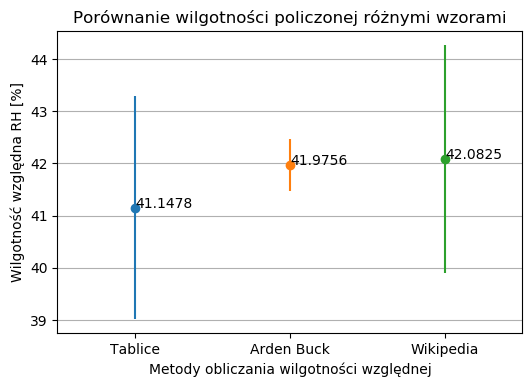

upO 103.61416606011628


In [9]:
print(val['T_R'], val['T_O'])
def calc_Arden_Buck(T):
    return 6.1121 * np.exp( (18.678 - T/234.5) * (T/(257.14 + T)) )

##d/dT(e^((T (18.678 - 0.00426439 T))/(T + 257.14))) = -(0.00426439 (T^2 + 514.28 T - 1.12627×10^6) e^((T (18.678 - 0.00426439 T))/(T + 257.14)))/(T + 257.14)^2
def calc_dArden_Buk(T):
    dAB_dT = -(0.00426439 * (T**2 + 514.28*T - 1.12627e6) * np.exp((T * (18.678 - 0.00426439 * T))/(T + 257.14)))/(T + 257.14)**2
    return dAB_dT



#pT_R = 1227.11
#pT_R = 1311.74
pT_R = calc_Arden_Buck(val['T_R'])
upT_R = calc_dArden_Buk(val['T_R'])
#pT_O = 2982.20 /100
pT_O = calc_Arden_Buck(val['T_O'])
upT_O = calc_dArden_Buk(val['T_R'])
print(pT_O)

wil_wzgl = pT_R/pT_O

uwil_wzgl = np.sqrt((1/pT_O)**2 * upT_R**2 +
                   + (-pT_R/pT_O**2)**2 * upT_O**2)


wil_0 = 1227.11 / 2982.20
upR = (1311.74 - 1147.28)/2/np.sqrt(3)
upO = (3166.57 - 2807.64)/2/np.sqrt(3)
uwil_0 = np.sqrt((1/2982.20)**2 * upR**2 +
                + (-1227.11 / 2982.20**2)**2 * upO**2)


def calc_wikipedia(t,T):
    H = ((t - 10 * T - 1120)/(9 * t + 1120))**8
    H = ((T + 112 - 0.1 * t) / (112 + 0.9*t))**8
    return H

def calc_dwikipedia(t,T):
    dH_dT = (8 * (-0.1 * t + T + 112)**7)/(0.9 * t + 112)**8
    dH_dt = -(1.85845e-6 * (T + 124.444) * (-t + 10 * T + 1120)**7)/(t + 124.444)**9
    return dH_dT, dH_dt
#d/dT(((T + 112 - 0.1 t)/(112 + 0.9 t))^8) = (8 (-0.1 t + T + 112)^7)/(0.9 t + 112)^8
#d/dt(((T + 112 - 0.1 t)/(112 + 0.9 t))^8) = -(1.85845×10^-6 (T + 124.444) (-t + 10 T + 1120)^7)/(t + 124.444)^9
H = calc_wikipedia(val['T_O'], val['T_R'])
dH_dT, dH_dt = calc_dwikipedia(val['T_O'], val['T_R'])

uH = np.sqrt(dH_dT**2 * val['uT']**2 +
            + dH_dt**2 * val['uT']**2)

print(wil_0 * 100,wil_wzgl * 100,  H * 100)
print(uwil_0*100,uwil_wzgl*100,  uH*100)
X = ['Tablice','Arden Buck',  'Wikipedia']
Y = [ wil_0,wil_wzgl, H]
YERR = [uwil_0,uwil_wzgl,  uH]

#plt.errorbar(['Arden Bucket')

for x, y, yerr in zip(X, Y, YERR):
    plt.errorbar([x],[y*100],[yerr*100], fmt='o')
    plt.text(x,y*100,'%.4f'%(y*100))

plt.xlim(left=-0.5, right=2.5)
plt.xlabel("Metody obliczania wilgotności względnej")
plt.ylabel("Wilgotność względna RH [%]")
plt.grid(axis='y')
plt.title("Porównanie wilgotności policzonej różnymi wzorami")
plt.savefig("wilgotnosc.png", dpi=600)
plt.show()
print("upO",upO)

In [10]:
rhoR = 0.009398
rhoO = 0.02177
urhoR = (0.01001 - 0.008818) / np.sqrt(3)

urhoO = (0.02304 - 0.02057) / np.sqrt(3)
print(rhoO, urhoO)
rhoR/rhoO

0.02177 0.0014260551648983756


0.4316949931097841

### Tab 3 - grzanie

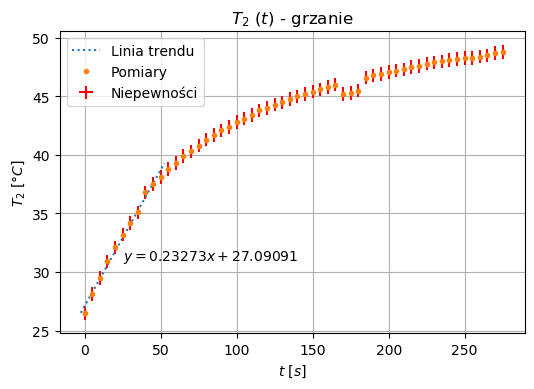

In [11]:
plt.rcParams['figure.dpi'] = 100

x = data3['t']
y = data3['T2']
xerr = np.ones(len(x)) * val['ut']
yerr = data3['uT2']


#p, V = np.polyfit(x,y,2, full=False, cov=True)
p1, V1 = np.polyfit(x[x<=50],y[x<=50],1, full=False, cov=True)

#plt.plot(x, p[0]*x**2 + p[1]*x + p[2],':',label='Linia trendu')
plt.plot(x[x<=55]-2.5, p1[0]*(x[x<=55]-2.5) + p1[1],':',label='Linia trendu')
#plt.plot(x, 2*p[0]*x + p[1], '-', label='Pochodna linii trendu', linewidth=1)
#plt.plot(x[x<=50]-2.5,y[x<=50].diff()/x[x<=50].diff(), '.', label="$\Delta T / \Delta t$", markersize=3)
#plt.plot(x[x<=50],np.ones(len(x[x<=50]))*p1[0], '-', label="$y={:.5}$".format(p1[0]), linewidth=1)

DT_Dt = (y[x<=50].diff()/x[x<=50].diff()).mean()
#print(y.diff()/x.diff(),y)
    
val['dT_dt_grz'] = p1[0]
val['udT_dt_grz'] = np.sqrt(V1[0][0])

val['dot_Q_grz'] = val['m'] * val['c'] * val['dT_dt_grz']
val['udot_Q_grz'] = np.sqrt(val['udT_dt_grz']**2 * (val['m'] * val['c'])**2)


#ax2 = ax1.twinx()

plt.plot(x,y,'.',label="Pomiary")

# ax1.set_xlabel('$t\ [s]$')
# ax1.set_ylabel('$T_2\ [\degree C]$')
# ax2.set_ylabel('Y2 data', color='b')
plt.xlabel('$t\ [s]$')
plt.ylabel('$T_2\ [\degree C]$')
plt.errorbar(x=x, y=y, xerr=xerr, yerr=yerr,fmt='none',color='red',label="Niepewności")

#plt.ylim(bottom=-4)
plt.grid(which='both',axis='both')
#plt.text(50, 8, '$y={:.5f}x^2{:.5f}x+{:.5f}$'.format(p[0],p[1],p[2]))
plt.text(25, 31, '$y={:.5f}x+{:.5f}$'.format(p1[0],p1[1]))
plt.legend()
plt.title("$T_2\ (t)$ - grzanie")
plt.savefig("T_t_grz.png", dpi=600)
plt.show()

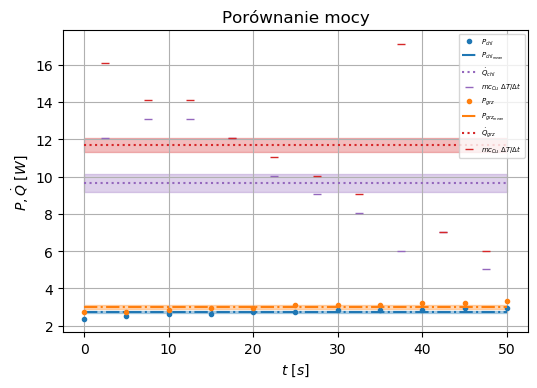

In [12]:
plt.rcParams['figure.dpi'] = 100

## CHŁODZENIE

data1['P'] = data1['U'] * val['I']
data1['uP'] = np.sqrt((1/val['I'])**2 * data1['uU']**2 +
                     + (-data1['U']/val['I']**2)**2 * val['uI']**2)
val['P_chl'] = data1.loc[data1['t']<=50, 'P'].mean()
val['uP_chl'] = calc_uA(data1.loc[data1['t']<=50, 'P'], val['P_chl'])

x = data1.loc[data1['t']<=50, 't']
y = data1.loc[data1['t']<=50, 'P']

plt.plot(x, y, '.', label = '$P_{chl}$', color='C0')
plt.plot(x, np.ones(len(x)) * val['P_chl'], '-.', label = '$P_{chl_{mean}}$', color='C0')
plt.fill_between(x, np.ones(len(x)) * val['P_chl']-val['uP_chl'], np.ones(len(x)) * val['P_chl']+val['uP_chl'], color = 'C0', alpha = 0.3)

plt.plot(x, -np.ones(len(x)) * val['dot_Q_chl'],':', label = '$\dot{Q}_{chl}$', color='C4')
plt.fill_between(x, -np.ones(len(x)) * val['dot_Q_chl']-val['udot_Q_chl'], -np.ones(len(x)) * val['dot_Q_chl']+val['udot_Q_chl'],
                color = 'C4', alpha = 0.3)

x = data1['t']
y = data1['T2']

plt.plot(x[x<=50]-2.5,-y[x<=50].diff()/x[x<=50].diff() * val['m'] * val['c'],
         '_', label="$mc_{Cu}\ \Delta T / \Delta t$", color='C4')


## GRZANIE

data3['P'] = data3['U'] * val['I']
data3['uP'] = np.sqrt((1/val['I'])**2 * data3['uU']**2 +
                     + (-data3['U']/val['I']**2)**2 * val['uI']**2)
val['P_grz'] = data3.loc[data3['t']<=50, 'P'].mean()
val['uP_grz'] = calc_uA(data1.loc[data1['t']<=50, 'P'], val['P_grz'])

x = data3.loc[data3['t']<=50, 't']
y = data3.loc[data3['t']<=50, 'P']

plt.plot(x, y, '.', label = '$P_{grz}$', color='C1')
plt.plot(x, np.ones(len(x)) * val['P_grz'], '-.', label = '$P_{grz_{mean}}$', color='C1')
plt.fill_between(x, np.ones(len(x)) * val['P_grz']-val['uP_grz'], np.ones(len(x)) * val['P_grz']+val['uP_grz'], color = 'C1', alpha = 0.3)
plt.plot(x, np.ones(len(x)) * val['dot_Q_grz'], ':', label = '$\dot{Q}_{grz}$', color='C3')
plt.fill_between(x, np.ones(len(x)) * val['dot_Q_grz']-val['udot_Q_grz'], np.ones(len(x)) * val['dot_Q_grz']+val['udot_Q_grz'],
                color = 'C3', alpha = 0.3)


x = data3['t']
y = data3['T2']

plt.plot(x[x<=50]-2.5,y[x<=50].diff()/x[x<=50].diff() * val['m'] * val['c'],
         '_', label="$mc_{Cu}\ \Delta T / \Delta t$", color='C3')

plt.grid(axis="both")
plt.legend(loc=1,prop={'size':5})
plt.xlabel("$t\ [s]$")
plt.ylabel("$P, \dot{Q}\  [W]$")
plt.title("Porównanie mocy")
plt.savefig("moc.png", dpi=600)
plt.show()


### dotQ za duże 

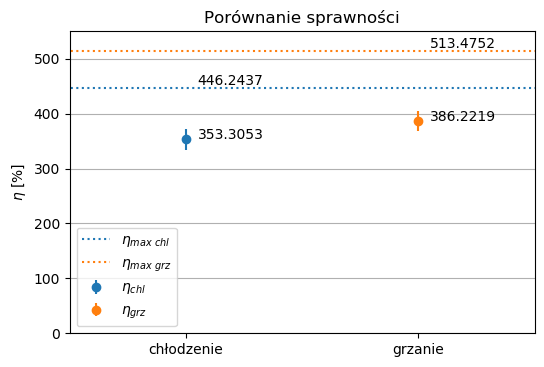

0.7917316713523481 0.7521725720122298


In [21]:
val['eta_chl'] = val['dot_Q_chl']/val['P_chl']

val['ueta_chl'] = np.sqrt((1/val['P_chl'])**2 * val['udot_Q_chl']**2 + (-val['dot_Q_chl']/val['P_chl']**2)**2 * val['uP_chl']**2)

val['eta_grz'] = val['dot_Q_grz']/val['P_grz']

val['ueta_grz'] = np.sqrt((1/val['P_grz'])**2 * val['udot_Q_grz']**2 + (-val['dot_Q_grz']/val['P_grz']**2)**2 * val['uP_grz']**2)

val['eta_max_chl'] = 1/(1-1/data1.loc[1, 'T2'] * data1.loc[data1['t']<=50, 'T2'].mean())
val['eta_max_grz'] = 1/(1-data3.loc[1, 'T2'] / data3.loc[data3['t']<=50, 'T2'].mean())

x0 = np.arange(-1,3,0.1)
plt.plot(x0, np.ones(len(x0))*val['eta_max_chl']*100,':',color="C0", label = "$\eta_{max\ chl}$")
plt.text(0.05,val['eta_max_chl']*100+6, "%.4f" % (val['eta_max_chl']*100))
plt.plot(x0, np.ones(len(x0))*val['eta_max_grz']*100,':',color="C1", label = "$\eta_{max\ grz}$")
plt.text(01.05,val['eta_max_grz']*100+6, "%.4f" % (val['eta_max_grz']*100))




plt.ylabel("$\eta$ [%]")
plt.grid(axis="y")

plt.errorbar(["chłodzenie"], -val['eta_chl']*100, val['ueta_chl']*100, fmt='o', label = "$\eta_{chl}$")
plt.text(0.05,-val['eta_chl']*100, "%.4f" % (-val['eta_chl']*100))
plt.errorbar(["grzanie"], val['eta_grz']*100, val['ueta_grz']*100, fmt='o', label = "$\eta_{grz}$")
plt.text(1.05,val['eta_grz']*100, "%.4f" % (val['eta_grz']*100))
plt.xlim(left=-0.5, right=1.5)
plt.ylim(bottom=0,top=550)
plt.legend()
plt.title("Porównanie sprawności")
plt.savefig("sprawnosci.png", dpi=600)
plt.show()

print(-val['eta_chl']/val['eta_max_chl'], val['eta_grz']/val['eta_max_grz'])

In [14]:
data1.head()

,t,T2,U,uT2,uU,P,uP
Lp.,,,,,,,
1,0,24.3,2.0,0.57735,0.069282,2.380,0.060897
2,5,23.1,2.1,0.57735,0.069859,2.499,0.061627
3,10,21.8,2.2,0.57735,0.070437,2.618,0.062365
4,15,20.5,2.2,0.57735,0.070437,2.618,0.062365
5,20,19.3,2.3,0.57735,0.071014,2.737,0.063110


In [15]:
wynik1 = pd.DataFrame()
wynik2 = pd.DataFrame()
wynik3 = pd.DataFrame()

wynik1[[r'$t$', r'$T_2$', r'$U$', r'$u(U)$', r'$P$', r'$u(P)$']] = data1[['t', 'T2', 'U', 'uU', 'P', 'uP']].copy()
wynik2[[r'$I$', r'$u(I)$', r'$T_1$', r'$T_2$', r'$\Delta T$']] = data2[['I', 'uI', 'T1', 'T2', 'T2-T1']]
wynik3[[r'$t$', r'$T_2$', r'$U$', r'$u(U)$', r'$P$', r'$u(P)$']] = data3[['t', 'T2', 'U', 'uU', 'P', 'uP']].copy()
wynik2.head()

wynik = wynik2
print(wynik.to_latex(escape=False, caption="Tabela 1 - chłodzenie",
                     label="tab:1", longtable=True, bold_rows=True))

\begin{longtable}{lrrrrr}
\caption{Tabela 1 - chłodzenie}\label{tab:1}\\
\toprule
{} &   $I$ &    $u(I)$ &  $T_1$ &  $T_2$ &  $\Delta T$ \\
\textbf{Lp.} &       &           &        &        &             \\
\midrule
\endhead
\midrule
\multicolumn{6}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
\textbf{1  } &  0.00 &  0.005774 &   24.8 &   24.8 &         0.0 \\
\textbf{2  } &  0.37 &  0.007910 &   19.5 &   25.8 &         6.3 \\
\textbf{3  } &  0.74 &  0.010046 &   14.8 &   26.8 &        12.0 \\
\textbf{4  } &  1.09 &  0.012067 &   11.1 &   28.1 &        17.0 \\
\textbf{5  } &  1.38 &  0.013741 &    8.6 &   29.6 &        21.0 \\
\textbf{6  } &  1.74 &  0.015819 &    6.2 &   32.0 &        25.8 \\
\textbf{7  } &  2.07 &  0.017725 &    4.7 &   34.5 &        29.8 \\
\textbf{8  } &  2.39 &  0.019572 &    3.9 &   37.7 &        33.8 \\
\textbf{9  } &  2.63 &  0.020958 &    3.8 &   40.7 &        36.9 \\
\textbf{10 } &  2.99 &  0.023036 &    3.8 &   44.4 &        4

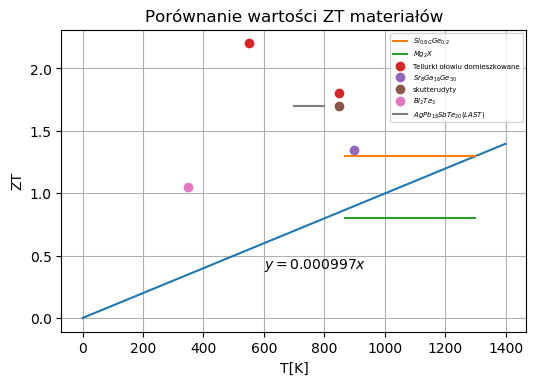

In [16]:
# for P in data1.loc[data1['t']<=50, 'P']:
#     print(P, '+')
plt.rcParams['figure.dpi'] = 100

x = np.arange(0,1400,1)
plt.plot(x, x*val['Z'])

x = np.arange(870,1300,1)
plt.plot(x,1.3*np.ones(len(x)), label="$Si_{0.8G} Ge_{0.2}$")
plt.plot(x,0.8*np.ones(len(x)), label="$Mg_2X$")
plt.plot([550,850], [2.2,1.8], 'o', label="Tellurki ołowiu domieszkowane")
plt.plot([900],[1.35],'o', label="$Sr_8 Ga_{16} Ge_{30}$")
plt.plot([850],[1.7],'o', label="skutterudyty")
plt.plot([75+273.15], [1.05], 'o', label = "$Bi_2 Te_3$")

x = np.arange(700,800,1)
plt.plot(x, np.ones(len(x))*1.7, label = '$AgPb_{18}SbTe_{20}(LAST)$')

plt.grid(axis="both")
plt.text(600,0.4, "$y=%.6fx$" % val['Z'], rotation = 0)
plt.xlabel("T[K]")
plt.ylabel("ZT")
plt.title("Porównanie wartości ZT materiałów")
plt.legend(prop={'size':5})
plt.savefig("materialyZT.png", dpi=600)
plt.show()

In [17]:
Pm = val['P_chl']
i = 0 
for P in data1.loc[data1['t']<=50, 'P']:
    print("({:.3f} - {:.3f})^2 +".format(P, Pm))
val

(2.380 - 2.737)^2 +
(2.499 - 2.737)^2 +
(2.618 - 2.737)^2 +
(2.618 - 2.737)^2 +
(2.737 - 2.737)^2 +
(2.737 - 2.737)^2 +
(2.856 - 2.737)^2 +
(2.856 - 2.737)^2 +
(2.856 - 2.737)^2 +
(2.975 - 2.737)^2 +
(2.975 - 2.737)^2 +


{'m': 130.4,
 'c': 0.3855,
 'T_R': 10.3,
 'T_O': 24.0,
 'I': 1.19,
 'res_T': 0.1,
 'res_I': 0.01,
 'res_U': 0.1,
 'uI': 0.012643970895252803,
 'uT': 0.5773502691896257,
 'ut': 0.5773502691896258,
 'dT_dt_chl': -0.19236363636363624,
 'udT_dt_chl': 0.009485574568006692,
 'dot_Q_chl': -9.669966109090904,
 'udot_Q_chl': 0.47683224507404204,
 'I_max': 8.381274724554306,
 'uI_max': 0.6075646256335427,
 'DT21_max': 69.12227475595576,
 'uDT21_max': 5.242356737664097,
 'T1_I_max': 372.2860242701692,
 'uT1_I_max': 6.602402233377784,
 'Z': 0.0009974578479317335,
 'uZ': 7.768972472774057e-05,
 'ZT': 0.3713396165835841,
 'uZT': 0.02966308565710765,
 'dT_dt_grz': 0.23272727272727267,
 'udT_dt_grz': 0.007201673104248783,
 'dot_Q_grz': 11.699013818181816,
 'udot_Q_grz': 0.36202234561210295,
 'P_chl': 2.7370000000000005,
 'uP_chl': 0.05785451974172331,
 'P_grz': 3.0290909090909093,
 'uP_grz': 0.10899016181243537,
 'eta_chl': -3.533053017570662,
 'ueta_chl': 0.1895492546783035,
 'eta_grz': 3.86221944777